## Final Project Submission

Please fill out:
* Student name: **Rich Caputo**
* Student pace: **self paced** 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL: https://friendlydata.blog/


# Welcome!

In this project, we will be analyzing a dataset on housing in King's County. Our goal is to build a linear model for predicting the price of houses based on the other metrics provided.

First, we will import our relevant packages and load the data. Then, we will do some preliminary exploration of the data and make decisions on the best way to get our data ready for model building. Finally, we will build, test, and improve our linear model. Let's dive in!

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We see that most of our data is numeric (either int64 or float64). This is good! However, we do see some issues jumping out at us. First, we see that sqft_basement is cast as an object. Let's see what's going on there.

In [4]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
248.0         1
792.0         1
2250.0        1
1920.0        1
2730.0        1
4130.0        1
2190.0        1
1008.0        1
768.0         1
2500.0        1
861.0         1
2400.0        1
475.0         1
1770.0        1
946.0         1
2130.0        1
784.0         1
704.0         1
2120.0        1
1990.0        1
2810.0        1
506.0         1
1960.0        1
2600.0        1
2580.0        1
266.0         1
3260.0        1
1281.0        1
2240.0        1
176.0         1
Name: sqft_basement, Len

Aha, there is a value labeled as `?` appearing 454 times. We need to fix this. Since the vast majority of this feature is represented as `0`, and only a small portion is represented as `?`, it is probably a good idea to cast `?` to `0`. 

In [7]:
df.loc[df.sqft_basement == '?', 'sqft_basement'] = 0.0
df.sqft_basement = df.sqft_basement.astype('float64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


Next, we need to investigate columns with `NaN` values.

In [15]:
df.yr_renovated.isna().sum()

3842

In [16]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [17]:
df.waterfront.isna().sum()

2376

In [18]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

For both of these columns, `0.0` is very dominant. Similarly as before, we will cast `NaN` values as `0.0`. 

In [19]:
df.waterfront.fillna(0, inplace=True)
df.yr_renovated.fillna(0, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


There are still a small number of rows with NaN view values. Let's examine this.

In [21]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Again, `0.0` is a clear winner! We will cast `NaN` as `0.0` here too. 

In [22]:
df.view.fillna(0, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


Okay, great, now each column has the same number of non-null entries and has an appropriate dtype (except for date, but we will fix that momentarily)! Our next step is to clean the data further so that it is model-ready. First, we will drop the id column since we won't need it for modeling purposes.

In [25]:
df.drop(['id'], axis=1, inplace=True)

Next, we need to figure out what to do with our date column. If sales go back far enough in time, we may see inflation / market fluctuations play an effect in our model. Let's examine this.

In [27]:
# Cast date to datetime format
df.date = pd.to_datetime(df.date)

In [39]:
df.date.max() - df.date.min()

Timedelta('390 days 00:00:00')

We see that our dates span roughly a year. We will assume that this timeframe is not long enough to have a significant affect and will thus drop the date column.

In [40]:
df.drop(['date'], axis=1, inplace=True)

We still have some columns that are not model ready. In particular, we need to do something about our location data so that a  linear model will perform well. We will use binning so that houses in a similar area are binned together. First, let's examine the zipcode column.

In [41]:
df.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Okay, there are 70 different zip codes. It is obvious that prices will not have a linear relationship with simply a zip code number. However, geographical location will certainly have an influence on housing prices. It may be easier to work with the provided lattitude and longitude columns. Let's plot their relationship with price. We will use a diverging colorbar to make it clear when an area is more expensive vs. less expensive

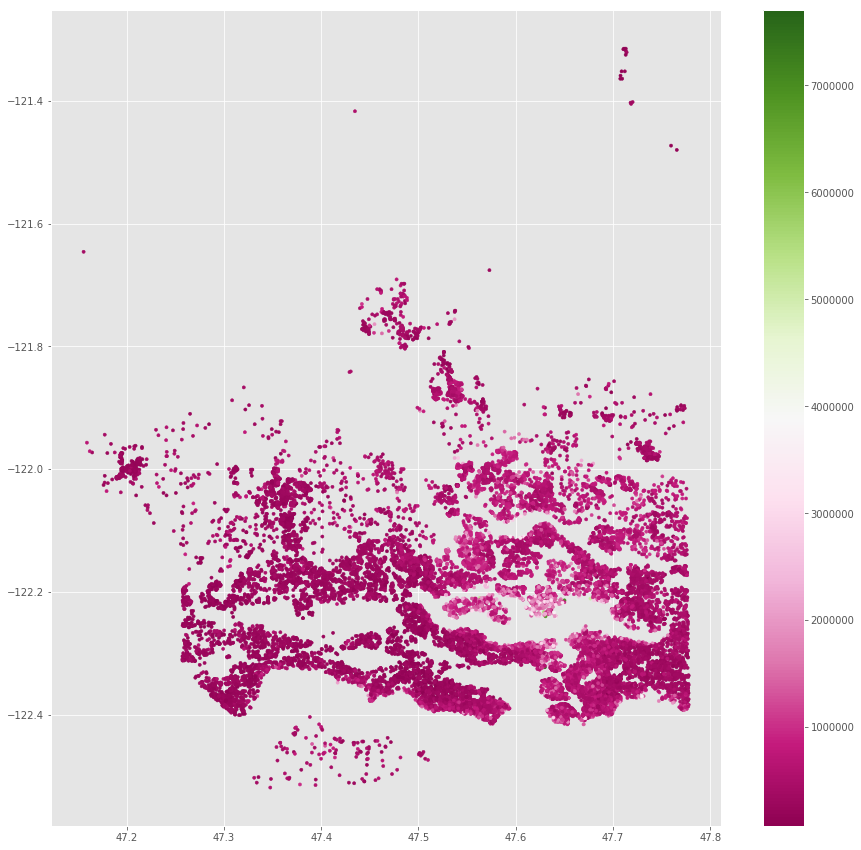

In [52]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 15))
plt.scatter(df.lat, df.long, c=df.price, s=10, cmap='PiYG')
plt.colorbar()

This plot shows that GPS location has a clear affect on price. Additionally, it captures more information than the zipcode column since it is more granular. However, we still need to figure out a creative way to make this feature usable for a linear model. 

One way to do this is binning, where bins of GPS locations are represented using one-hot encoding. But, doing this using lat and long separately will only bin the data rectangularly. This would lose a lot of predictive power and lead to model bias. Instead, we are going to use a fancy tool called spectral clustering to capture geographical clusters in our data. This will allow us to effectively bin our geographical data and retain a lot of predictive power.



In [47]:
X = df[['lat', 'long']]

In [56]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)

C:\Users\rcapu\Anaconda3\envs\learn-env\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


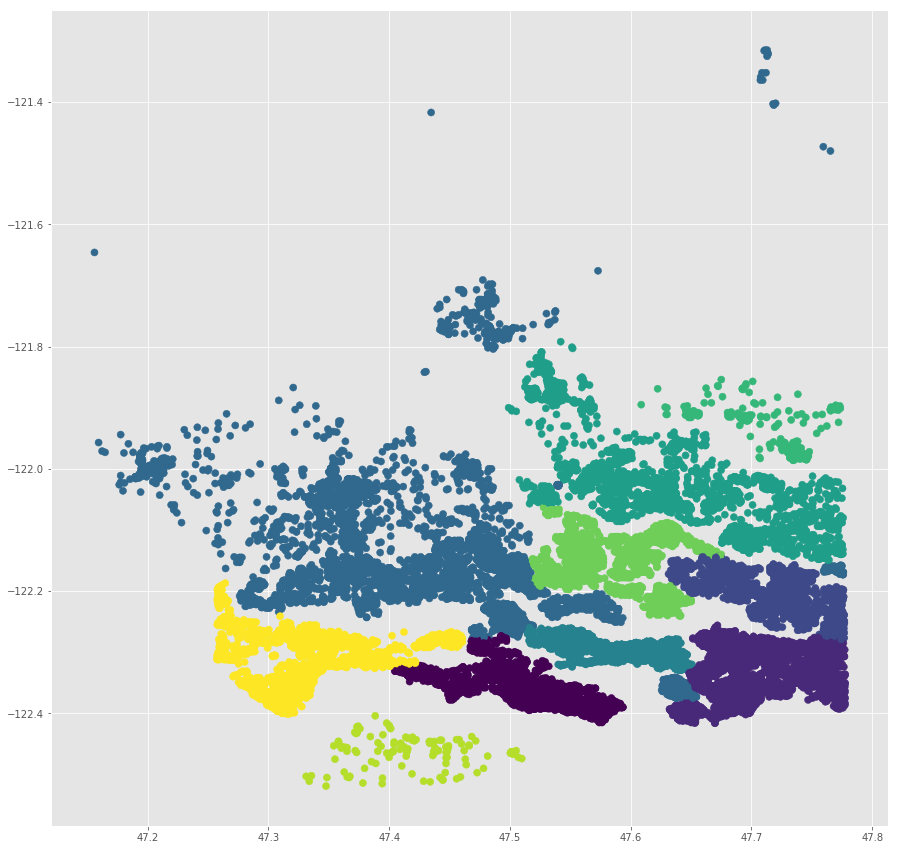

In [57]:
plt.figure(figsize=(15, 15))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels,
            s=50, cmap='viridis');

Wow, that did a great job capturing the geographical nuances of our data. Using these labels, we will create new columns to represent geographical location based on our cluster bins. Of course, this won't perfectly capture all the information provided, but it will definitely allow us to build a linear relationship between price and location. Let's take a look at what the bin labels look like.

In [61]:
labels[:10]

array([3, 1, 2, 0, 5, 5, 9, 9, 0, 3])

We see that each label represents numerically the cluster that data point belongs to. This can be easily fit into our dataset!

In [62]:
df['location'] = labels

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
location         21597 non-null int32
dtypes: float64(9), int32(1), int64(10)
memory usage: 3.2 MB


In [64]:
df.location = df.location.astype('category')
df = pd.get_dummies(df)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 29 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
location_0       21597 non-null uint8
location_1       21597 non-null uint8
location_2       21597 non-null uint8
location_3       21597 non-null uint8

Boom! That's the power of one-hot encoding. We just dealt with a problematic subset of our data and made it look easy. We can now drop our lat, long, and zipcode columns.

In [66]:
df.drop(['lat', 'long', 'zipcode'], axis=1, inplace=True)

We are almost done cleaning the data. Before we figure out which transformations / normalizations we need to do, we need to deal with the columns yr_built and yr_renovated. As we saw before, a vast majority of houses were not rennovated. Thus, it might be much easier to represent yr_rennovated as a binary variable: 1 if rennovated, 0 if not rennovated. Although this is a simplification, it will be much better for modeling purposes.

In [70]:
df['renovated'] = (df.yr_renovated > 0).astype('uint8')
df.drop(['yr_renovated'], axis=1, inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
location_0       21597 non-null uint8
location_1       21597 non-null uint8
location_2       21597 non-null uint8
location_3       21597 non-null uint8
location_4       21597 non-null uint8
location_5       21597 non-null uint8
location_6       21597 non-null uint8
location_7       21597 non-null uint8
locat

In [73]:
df.renovated.value_counts()

0    20853
1      744
Name: renovated, dtype: int64